# Market Data Exercise

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Data Prep

In [29]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [30]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,69,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [31]:
#merge the charts and tracks dataset
df = charts_df.merge(tracks_df, on='track_id', how='left')
#
df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})
df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


## Instructions

1. (*Easy- Individual Work*) Among those included in the Spotify charts, pick 1 artist you like to analyze. 

   a. Plot the streams and positions of their top 5 streamed songs.

   b. Compare these charts with streams and positions of what you feel to be a possible collaborator/competitor/related artist. 

   What insights can you draw from the data?

In [32]:
df['date'] = pd.to_datetime(df['date'])

In [33]:
df.set_index('date',inplace=True)

In [34]:
artist_selected="Bruno Mars"

In [35]:
artist1_df = df[ (df['artist']==artist_selected) & (df['position']<=5) ]

In [36]:
artist1_df[(artist1_df['position']<=5)][['track_name']].value_counts()

track_name                    
Versace on the Floor              120
That's What I Like                119
Leave The Door Open                76
Finesse - Remix; feat. Cardi B     10
24K Magic                           1
dtype: int64

In [37]:
artist1_df.groupby(['track_name'])['streams'].sum().sort_values(ascending=False).to_frame()

,streams
track_name,
Versace on the Floor,27768215
That's What I Like,24085359
Leave The Door Open,18547817
Finesse - Remix; feat. Cardi B,1416596
24K Magic,150963


Text(0.5, 1.0, 'Cumulative Total Streams')

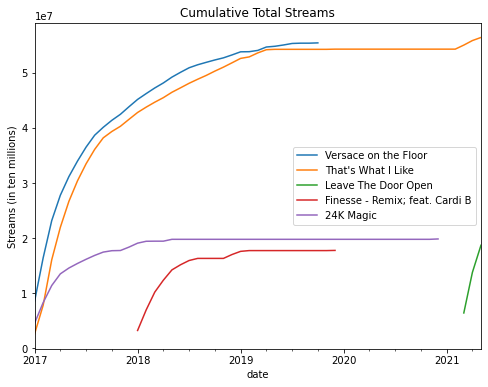

In [38]:
# Code for Part 1 here



#
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=="Versace on the Floor"]['streams'].resample('M').sum().cumsum()
data2 = df[df['track_name']=="That's What I Like"]['streams'].resample('M').sum().cumsum()
data3 = df[df['track_name']=="Leave The Door Open"]['streams'].resample('M').sum().cumsum()
data4 = df[df['track_name']=="Finesse - Remix; feat. Cardi B"]['streams'].resample('M').sum().cumsum()
data5 = df[df['track_name']=="24K Magic"]['streams'].resample('M').sum().cumsum()

data1.plot(ax=ax, label="Versace on the Floor")
data2.plot(ax=ax, label="That's What I Like")
data3.plot(ax=ax, label="Leave The Door Open")
data4.plot(ax=ax, label="Finesse - Remix; feat. Cardi B")
data5.plot(ax=ax, label="24K Magic")

plt.legend(["Versace on the Floor","That's What I Like","Leave The Door Open","Finesse - Remix; feat. Cardi B","24K Magic"])
plt.ylabel('Streams (in ten millions)')
plt.title('Cumulative Total Streams')


Text(0.5, 1.0, 'Cumulative Total Streams')

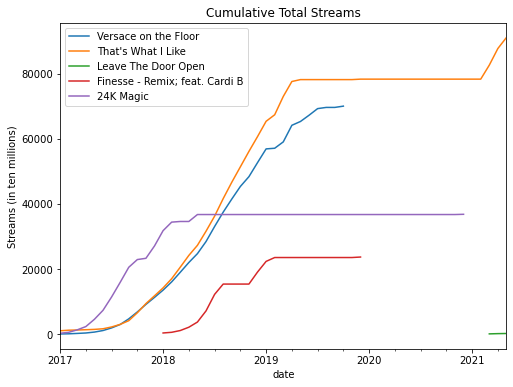

In [39]:

#
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=="Versace on the Floor"]['position'].resample('M').sum().cumsum()
data2 = df[df['track_name']=="That's What I Like"]['position'].resample('M').sum().cumsum()
data3 = df[df['track_name']=="Leave The Door Open"]['position'].resample('M').sum().cumsum()
data4 = df[df['track_name']=="Finesse - Remix; feat. Cardi B"]['position'].resample('M').sum().cumsum()
data5 = df[df['track_name']=="24K Magic"]['position'].resample('M').sum().cumsum()

data1.plot(ax=ax, label="Versace on the Floor")
data2.plot(ax=ax, label="That's What I Like")
data3.plot(ax=ax, label="Leave The Door Open")
data4.plot(ax=ax, label="Finesse - Remix; feat. Cardi B")
data5.plot(ax=ax, label="24K Magic")

plt.legend(["Versace on the Floor","That's What I Like","Leave The Door Open","Finesse - Remix; feat. Cardi B","24K Magic"])
plt.ylabel('Streams (in ten millions)')
plt.title('Cumulative Total Streams')


2. (*Intermediate - Group Work*) A song may be classified as follows:

   - **Mainstay** - Song with high streams ($>X_1$ streams) and position ($>P_1$ position) all throughout the year
   - **Viral** - Song that reach the peak position fast with high increase in streams ($>X_2$ streams/day),
     followed by a rapid decline in position ($P_2$ places/day) and streams ($>X_3$ streams/day)
   - **Seasonal** - Song that garner considerable streams ($>X_4$ streams) within a certain season and go into low ranks/ disappear from the chart after the season
    
   a. Discuss among your group how you would define and set values to the thresholds that you will use to classify the songs according to the categories as described above. (You may add more thresholds to refine the definitions, as you see fit)
   
   b. Using your group's definition in (a) name as many songs as you can per classification and plot their streams and position as a time series.

In [40]:
# Mainstay
# Mainstay - Song with high streams ( >𝑋1  streams) and position ( >𝑃1  position) all throughout the year
#getting mainstay streams
X1 = df.groupby(['track_id','track_name'])[['streams','position']].agg(streams=('streams', sum), position=('position', min)).sort_values(['streams','position'], ascending=[False,True])
X1['streams'].quantile(0.75)

#Mainstay - Will refer to songs equal to or above the upper quantile (Q3). X1 = 3,597,481.75 P1 = 50

3357416.25

In [41]:
X1

,,streams,position
track_id,track_name,,
3WUEs51GpcvlgU7lehLgLh,Kathang Isip,137574061,2
2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,124246178,1
1yDiru08Q6omDOGkZMPnei,Maybe The Night,117216219,1
1X4l4i472kW5ofFP8Xo0x0,Sana,116625610,1
5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,115333908,2
...,...,...,...
6hmhG1b4LEyNuashVvuIAo,Never Forget You,12343,162
7nD9nN3jord9wWcfW3Gkcm,All In My Head (Flex) (feat. Fetty Wap),11300,191
7x5xYW5W42OGPAdHUyyguy,Locked Away (feat. Adam Levine),11209,194


In [42]:
#getting mainstay -- positions
P1 = df.groupby(['track_id','track_name'])[['streams','position']].agg(streams=('streams', sum), position=('position', min)).sort_values(['streams','position'], ascending=[False,True])
P1['position'].quantile(0.25)

39.0

In [43]:
P1

,,streams,position
track_id,track_name,,
3WUEs51GpcvlgU7lehLgLh,Kathang Isip,137574061,2
2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,124246178,1
1yDiru08Q6omDOGkZMPnei,Maybe The Night,117216219,1
1X4l4i472kW5ofFP8Xo0x0,Sana,116625610,1
5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,115333908,2
...,...,...,...
6hmhG1b4LEyNuashVvuIAo,Never Forget You,12343,162
7nD9nN3jord9wWcfW3Gkcm,All In My Head (Flex) (feat. Fetty Wap),11300,191
7x5xYW5W42OGPAdHUyyguy,Locked Away (feat. Adam Levine),11209,194


In [44]:
# Viral


In [45]:
# Seasonal


3. (*Advanced - Individual, Optional*) What percentage of Spotify charts streams from 2018-2020 are from mainstay songs? viral songs? seasonal songs? songs that do not belong in any of these categories? What does this reveal about the streaming market?

In [46]:
# Code for Part 3 here


## Sprint EDA

In [65]:
df.columns.sort_values()

Index(['acousticness', 'album_id', 'artist', 'artist_id', 'artist_name',
       'danceability', 'duration', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 'position',
       'release_date', 'speechiness', 'streams', 'tempo', 'track_id',
       'track_name', 'valence'],
      dtype='object')

In [66]:
df.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


### Hitmaker: Britney Spears

In [71]:
df[df['artist_name']=='Britney Spears']

noobs = df.groupby('artist_name')[['album_id']].count().sort_values(by='album_id', ascending=True).reset_index().rename(columns={'album_id':'album_count'})

noobs_list = noobs[noobs['album_count']==1]['artist_name']

noobs


,artist_name,album_count
0,Marvin Gaye,1
1,Bryan Adams,1
2,R. City,1
3,Dagny,1
4,Joshua Garcia,1
...,...,...
794,December Avenue,5946
795,Moira Dela Torre,6450
796,Ben&Ben,8066
797,LANY,8629


In [72]:
noobs_list

0       Marvin Gaye
1       Bryan Adams
2           R. City
3             Dagny
4     Joshua Garcia
          ...      
61             JoJo
62    Jordin Sparks
63        James Bay
64          Claudia
65            LeeHi
Name: artist_name, Length: 66, dtype: object

In [76]:
df[(df['artist_name'].isin(noobs_list))].head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,194,7x5xYW5W42OGPAdHUyyguy,Locked Away (feat. Adam Levine),R. City,11209,4TH4BHy0LdBi3dpBW4P2UX,R. City,4AUTMNSP56xicSznzKgzjB,227480,2015-10-09,...,0.671,1.0,-5.709,1.0,0.0678,0.304,0.000000,0.0452,0.550,118.413
2017-01-06,183,0ecAxY4uqROZWKSUaRVCK7,"Hey Crush - From ""Vince & Kath & James""",Joshua Garcia,15312,4KOFxteqSAveWCElBVijTy,Joshua Garcia,3zrmszGcMfAndeIQrW7nY3,137090,2016-12-10,...,0.517,8.0,-6.302,1.0,0.0300,0.534,0.000000,0.2280,0.730,109.054
2017-01-09,191,13HVjjWUZFaWilh2QUJKsP,Let It Go,James Bay,14659,4EzkuveR9pLvDVFNx6foYD,James Bay,5BxvswQSGWrBbVCdx6mFGO,260533,2014-12-15,...,0.311,1.0,-10.396,1.0,0.0288,0.818,0.000017,0.1070,0.246,147.464
2017-02-14,146,5K7AMlpc4796JRWXb26nCV,I'll Be,Edwin McCain,22790,0L6Gwm0JDrgIQJfjarWSUR,Edwin McCain,1JB1Zvcddt81PiipQQC319,266533,1997,...,0.609,11.0,-5.524,1.0,0.0295,0.386,0.000000,0.1040,0.426,136.526
2017-02-14,182,66l54YRkk0mU2ECTdxJGqS,Bakit Pa Ba,Jay R,18532,3z0IVhtuFvt9VYUZGT98PU,Jay R,0upzjL3KMPH1JZtlFOZt4K,283520,2007-01-23,...,0.388,5.0,-7.459,1.0,0.0275,0.728,0.000000,0.1490,0.176,117.536


In [77]:
df[(df['artist_name'].isin(noobs_list)) & (df['release_date']>='2020-01-01')].head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,,,,,,,,,,,
2020-01-17,182,1au5xiyFC0L7lOrlW2rvlE,AWIT,Young Vito,27184,3gz6bSc7rsT9g4cB7r4xac,Young Vito,272lKmRJgvNCnr98vr1lqj,178333,2020-01-17,...,0.430,0.0,-13.935,1.0,0.0540,0.325,0.05090,0.0680,0.358,144.052
2020-01-23,96,4O2XaXdnpyUPj90lNq1bIR,Simmer,Hayley Williams,44002,6Rx1JKzBrSzoKQtmbVmBnM,Hayley Williams,6y66tQfVkXh0NIScWb9yKX,266115,2020-01-22,...,0.598,7.0,-7.418,1.0,0.0430,0.213,0.00271,0.1180,0.362,109.970
2020-03-23,195,5CDq3Ekm0E0c23S0mbEELV,Here I Am Again,Yerin Baek,21431,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,476k6ufG2tovEGKDHolLSB,234840,2020-01-12,...,0.465,9.0,-4.493,1.0,0.0286,0.831,0.00000,0.1070,0.204,131.644
2020-05-12,164,4KL3FJYexPrPuMdPagHPXp,Yours,Raiden,24142,4YXNoMVTHRt01jYaKXTumJ,Raiden,01RsFGO7W7xaRM4T2p1Xdn,235413,2020-05-12,...,0.774,8.0,-3.988,1.0,0.0338,0.137,0.00000,0.1060,0.392,86.994
2020-09-22,193,0QpOqKz66ZxHNqj2PPHiFF,Backyard Boy,Claire Rosinkranz,26872,3V0ZQW0dNuVaFtbVYgSI24,Claire Rosinkranz,47MpwVFLbn15zhYD3mIx5y,129240,2020-08-14,...,0.634,5.0,-7.246,1.0,0.1620,0.321,0.00000,0.0735,0.453,138.015


## Feature Engineering